Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Homography Matrix:
 [[ 4.49636564e-01  2.74200536e-01  3.30000000e+02]
 [-1.36388003e-01  9.30936253e-02  1.86000000e+02]
 [ 5.99554214e-05 -1.31274942e-05  1.00000000e+00]]


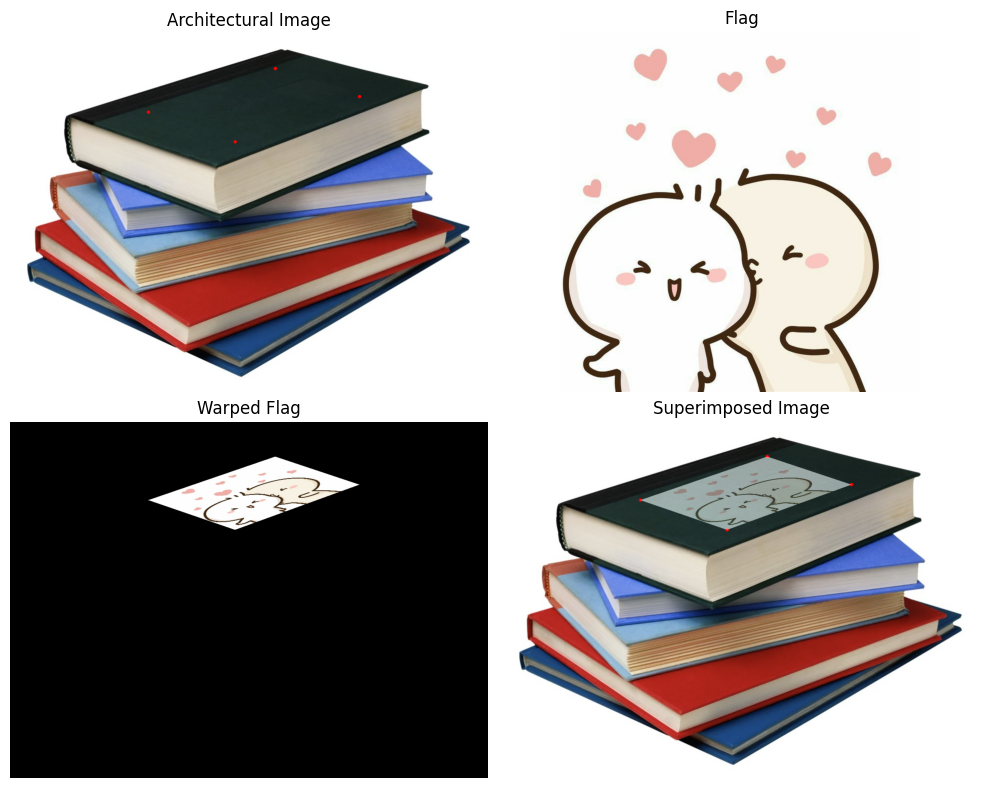

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

selected_points = []

# mouse click events
def mouse_click(event, x, y, flags, param):
    global selected_points
    if event == cv2.EVENT_LBUTTONDOWN:
        selected_points.append((x, y))
        cv2.circle(architectural_image, (x, y), 4, (0, 0, 255), -1)
        cv2.imshow('Image', architectural_image)

architectural_image = cv2.imread('books.jpg')
flag = cv2.imread('sticker.jpg')

# Normalize images 
architectural_image = architectural_image.astype(np.float32) / 255.0
flag = flag.astype(np.float32) / 255.0

# Display the  image to select four points
cv2.imshow('Image', architectural_image)
cv2.setMouseCallback('Image', mouse_click)

while len(selected_points) < 4:
    cv2.waitKey(1)

cv2.destroyAllWindows()

# Convert selected points into an array of floats
dst_points = np.array(selected_points).astype(np.float32)
h2, w2 = flag.shape[:2]
# flag corners
src_points = np.float32([[0, 0], [w2, 0], [w2, h2], [0, h2]])

# homography matrix
H = cv2.getPerspectiveTransform(src_points, dst_points)
print('Homography Matrix:\n', H)

flag_warped = cv2.warpPerspective(flag, H, (architectural_image.shape[1], architectural_image.shape[0]))

superimposed_image = cv2.addWeighted(architectural_image, 1, flag_warped, 0.5, 0)

# Plot 
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(architectural_image, cv2.COLOR_BGR2RGB))
plt.title('Architectural Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(flag, cv2.COLOR_BGR2RGB))
plt.title('Flag')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(flag_warped, cv2.COLOR_BGR2RGB))
plt.title('Warped Flag')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(superimposed_image, cv2.COLOR_BGR2RGB))
plt.title('Superimposed Image')
plt.axis('off')

plt.tight_layout()
plt.show()
